In [2]:
from collections import Counter

import matplotlib.pyplot as plt
import pandas as pd

from dataset import ArgumentDataset
from utils.text import to_sentences

In [3]:
dataset = ArgumentDataset()

In [ ]:
# sentence histogram
sentences_counter = Counter()

for essay_path in dataset.essay_paths():
    with open(essay_path) as f:
        essay_text = f.read()
        sentences_counter[len(to_sentences(essay_text))] += 1

xs = []
ys = []
for x, y in iter(sentences_counter.items()):
    xs.append(x)
    ys.append(y)
fig, ax = plt.subplots()
ax.plot(xs, ys, 'k+')
plt.show()

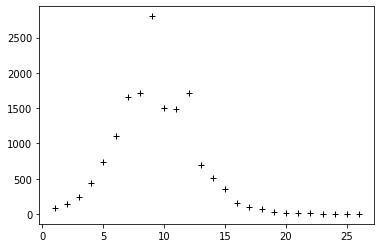

In [5]:
# argument histogram
args_counter = Counter()

for essay in dataset.essays():
    args_counter[len(essay)] += 1

xs = []
ys = []
for x, y in iter(args_counter.items()):
    xs.append(x)
    ys.append(y)
fig, ax = plt.subplots()
ax.plot(xs, ys, 'k+')
plt.show()